In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

In [2]:
def show_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

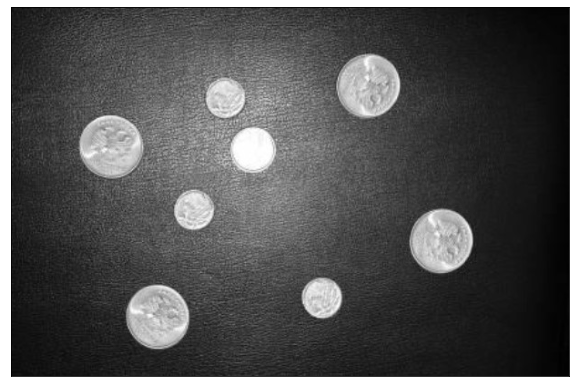

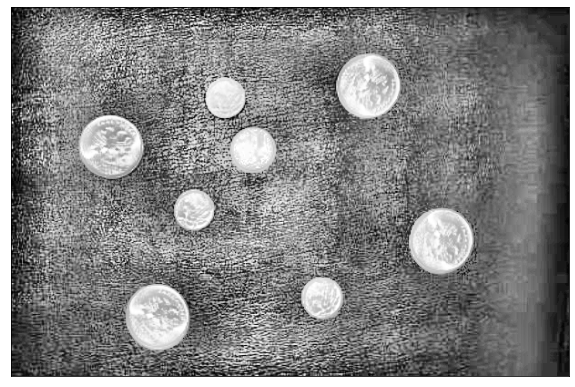

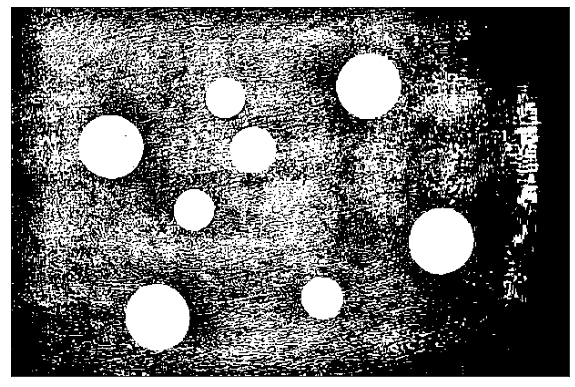

In [22]:
img = cv2.imread('money.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show_image(gray)
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(8,8))
gray = clahe.apply(gray)
show_image(gray)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show_image(thresh)

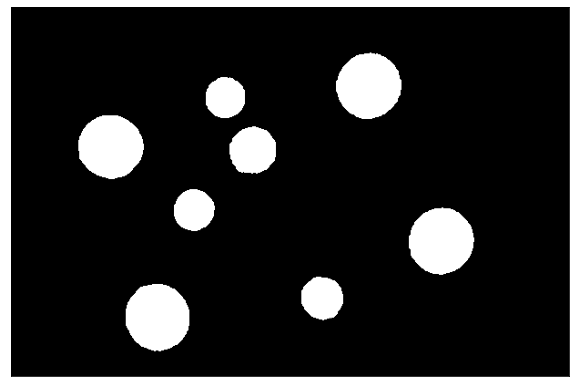

In [23]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)))
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)))
show_image(closing)

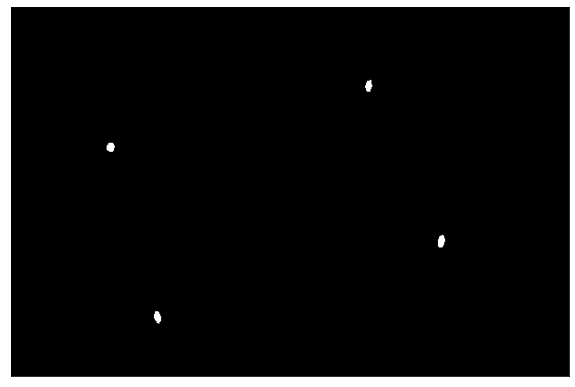

In [5]:
markers5 = cv2.erode(closing, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)), iterations=5)
show_image(markers5)

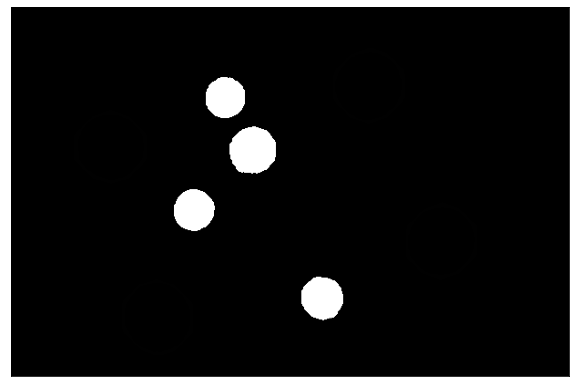

In [6]:
all_except5 = closing - cv2.dilate(markers5, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)), iterations=6)
show_image(all_except5)

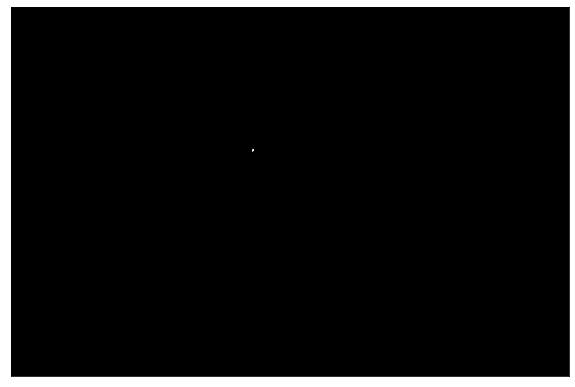

In [7]:
markers2 = cv2.erode(all_except5, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(17,17)), iterations=3)
show_image(markers2)

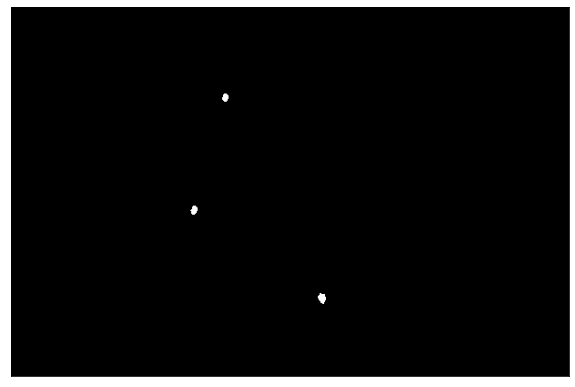

In [8]:
markers1 = all_except5 - cv2.dilate(markers2, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)), iterations=5)
markers1 = cv2.erode(markers1, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)), iterations=3)
show_image(markers1)

In [9]:
count5, markers5 = cv2.connectedComponents(markers5)
count2, markers2 = cv2.connectedComponents(markers2)
count1, markers1 = cv2.connectedComponents(markers1)

In [17]:
def draw_contours(img_source, img_bg, markers, markers_count, img_to_draw, color_to_draw):
    markers[img_bg == 0] = markers_count + 1
    markers = cv2.watershed(img_source, markers)
    img_to_draw[markers == -1] = color_to_draw

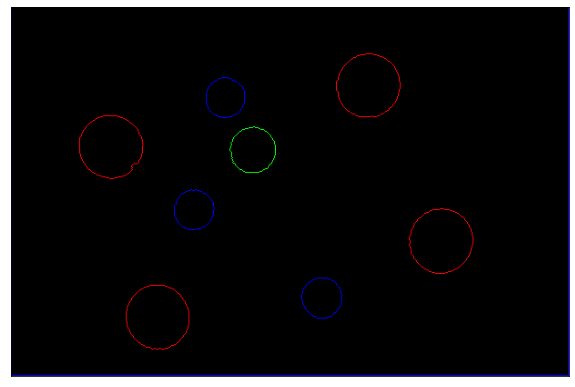

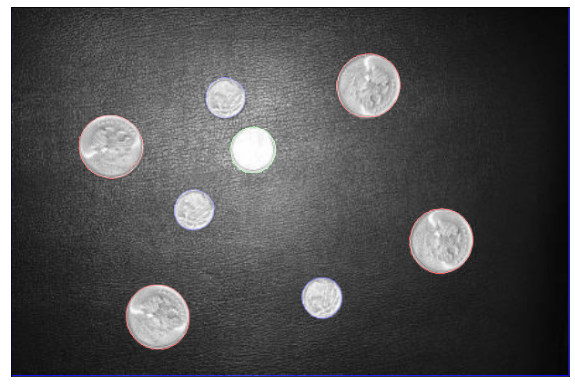

Монет номиналом 5 рублей:	 4
Монет номиналом 2 рубля:	 1
Монет номиналом 1 рубль:	 3


In [19]:
contours  = np.zeros_like(img)
draw_contours(img, closing, markers5, count5, contours, (255, 0, 0))
draw_contours(img, closing, markers2, count2, contours, (0, 255, 0))
draw_contours(img, closing, markers1, count1, contours, (0, 0, 255))
show_image(contours)
img_final = img.copy()
img_final[contours != (0, 0, 0)] = contours[contours != (0, 0, 0)]
show_image(img_final)
print("Монет номиналом 5 рублей:\t", count5 - 1)
print("Монет номиналом 2 рубля:\t", count2 - 1)
print("Монет номиналом 1 рубль:\t", count1 - 1)